In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Load the CSV file
parentFolder = '../results/test1/'
df = pd.read_csv(parentFolder + 'test1.csv')

top50Filename = '../data/processed/top50.csv'

# Extract the columns
assignedCodes = df['predicted'].values
correctCodes = df['actual'].values

Grouping for ICD chapter analysis

In [3]:
chapters = {}

# Extract the first letter of each ICD code for chapter grouping
chapter_labels = [str(code)[0] for code in correctCodes]

# Calculate metrics for each chapter
unique_chapters = np.unique(chapter_labels)

# Compute metrics for each chapter
for chapter in unique_chapters:
    
    # Get the indices of codes that belong to current chapter
    chapter_indices = [i for i, x in enumerate(chapter_labels) if x == chapter]
    
    # Get the true and predicted codes for current chapter
    true_codes = correctCodes[chapter_indices]
    predicted_codes = assignedCodes[chapter_indices]

    # Convert to strings and replace full stops
    assignedCodes = df['predicted'].apply(lambda x: str(x).replace('.', '')).values
    correctCodes = df['actual'].apply(lambda x: str(x).replace('.', '')).values


    # Compute the metrics (precision, recall, F1) with zero_division=0
    precision, recall, f1, _ = precision_recall_fscore_support(
        true_codes, predicted_codes, average='macro', zero_division=0
    )
    
    # Store the results for current chapter
    chapters[chapter] = {
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Convert results into dataframe
chapter_df = pd.DataFrame(chapters).T
chapter_df = chapter_df.sort_values(by='f1_score', ascending=False)

print(chapter_df)


   precision    recall  f1_score
O   0.333333  0.155556  0.212121
F   0.178413  0.090358  0.110579
M   0.111111  0.106180  0.108590
K   0.153410  0.083249  0.097974
L   0.090060  0.063121  0.074138
J   0.108646  0.060145  0.064402
E   0.071429  0.050572  0.053941
I   0.147772  0.026993  0.042732
Z   0.045455  0.038006  0.041398
C   0.071429  0.025723  0.037824
A   0.068785  0.027858  0.031851
R   0.071515  0.032064  0.031025
S   0.062500  0.013379  0.022040
T   0.075980  0.012396  0.019555
G   0.045455  0.011328  0.018136
N   0.026223  0.000818  0.001363


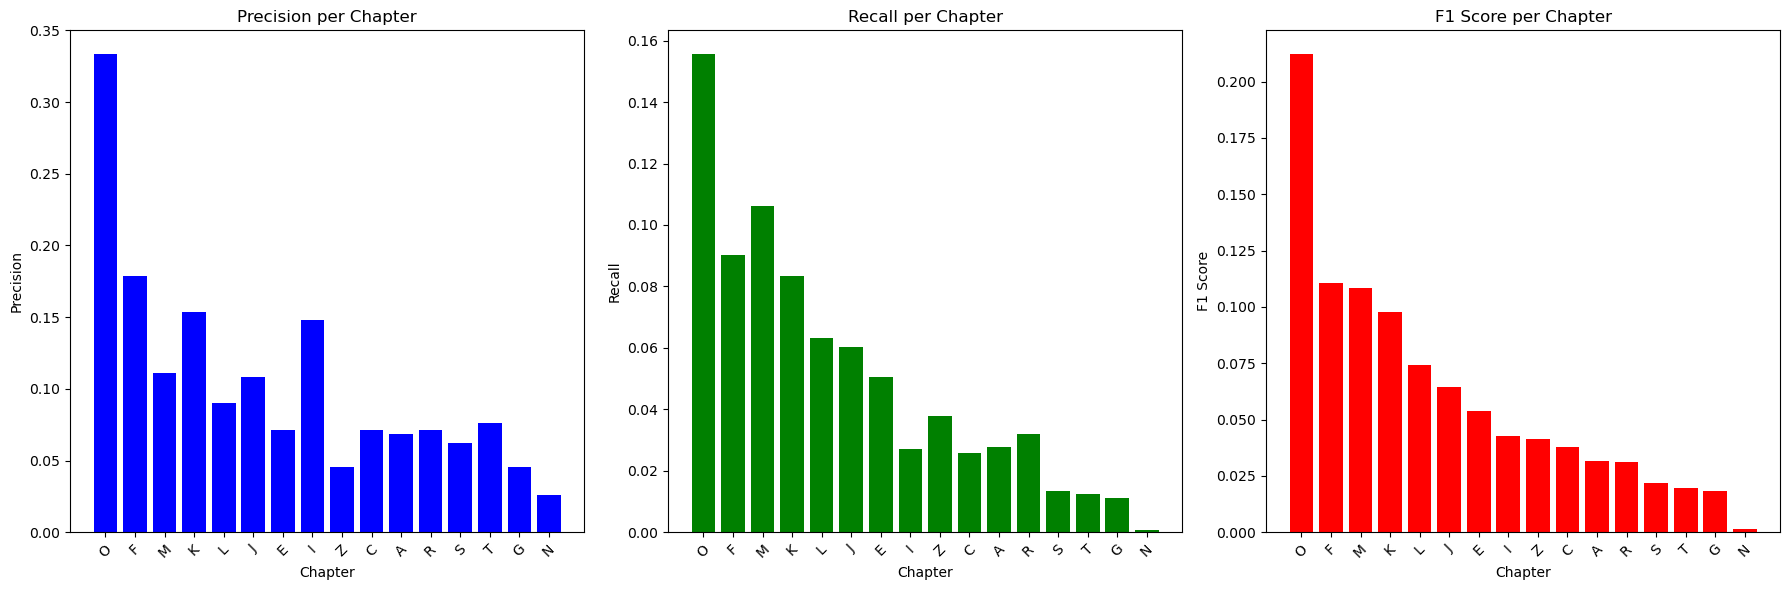

In [4]:
# Plotting precision recall and f1-scores
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Precision plot
axes[0].bar(chapter_df.index, chapter_df['precision'], color='b')
axes[0].set_title('Precision per Chapter')
axes[0].set_xlabel('Chapter')
axes[0].set_ylabel('Precision')

# Recall plot
axes[1].bar(chapter_df.index, chapter_df['recall'], color='g')
axes[1].set_title('Recall per Chapter')
axes[1].set_xlabel('Chapter')
axes[1].set_ylabel('Recall')

# F1 Score plot
axes[2].bar(chapter_df.index, chapter_df['f1_score'], color='r')
axes[2].set_title('F1 Score per Chapter')
axes[2].set_xlabel('Chapter')
axes[2].set_ylabel('F1 Score')

# Rotate x-axis labels properly
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(parentFolder + 'chapters.png') 
plt.show()


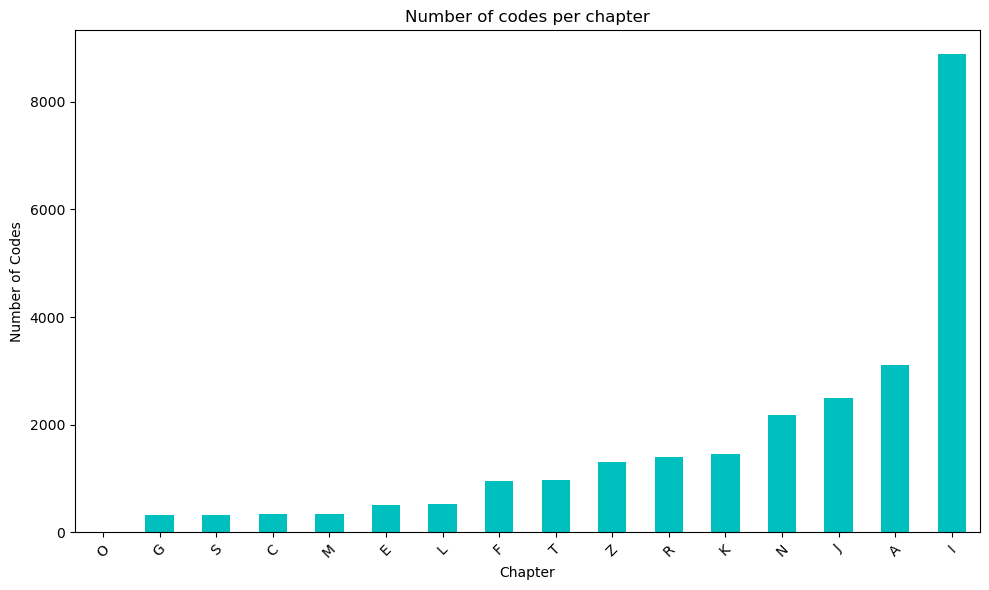

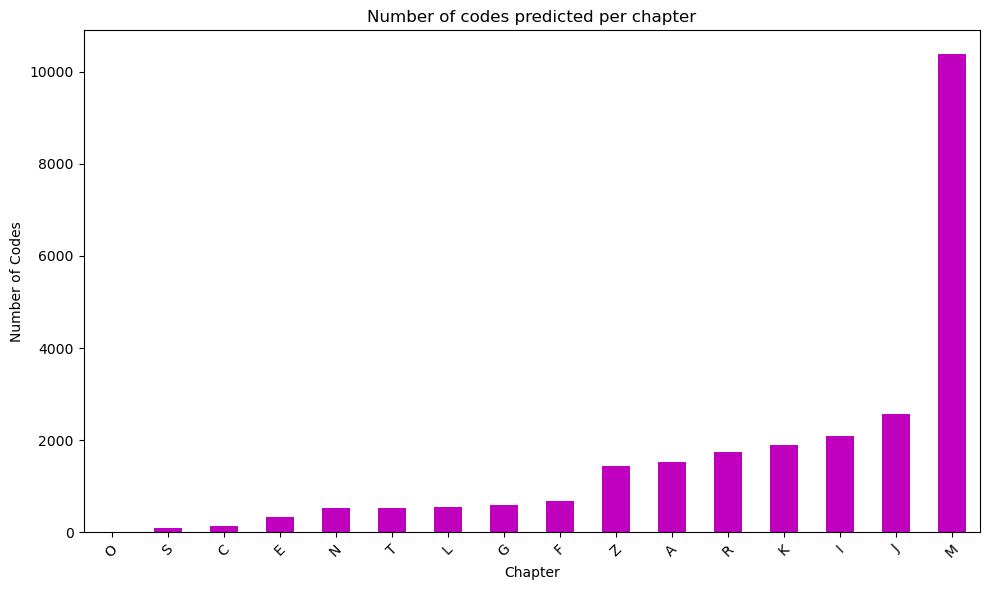

In [5]:
# Plot chapter distribution
chapter_counts = pd.Series(chapter_labels).value_counts()

plt.figure(figsize=(10, 6))
chapter_counts.sort_values().plot(kind='bar', color='c')
plt.title('Number of codes per chapter')
plt.xlabel('Chapter')
plt.ylabel('Number of Codes')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(parentFolder + 'numCodePerChapter.png') 
plt.show()


# Plot chapter distribution again but for assigned codes rather than actual
predicted_chapter_labels = [str(code)[0] for code in assignedCodes]
predicted_chapter_counts = pd.Series(predicted_chapter_labels).value_counts()

plt.figure(figsize=(10, 6))
predicted_chapter_counts.sort_values().plot(kind='bar', color='m')
plt.title('Number of codes predicted per chapter')
plt.xlabel('Chapter')
plt.ylabel('Number of Codes')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(parentFolder + 'predictedNumCodePerChapter.png')
plt.show()

In [6]:
accuracy = accuracy_score(correctCodes, assignedCodes)
f1_micro = f1_score(correctCodes, assignedCodes, average='micro', zero_division=0)
f1_macro = f1_score(correctCodes, assignedCodes, average='macro', zero_division=0)
precision = precision_score(correctCodes, assignedCodes, average='macro', zero_division=0)
recall = recall_score(correctCodes, assignedCodes, average='macro', zero_division=0)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score (Micro): {f1_micro:.4f}')
print(f'F1 Score (Macro): {f1_macro:.4f}')
print(f'Precision (Macro): {precision:.4f}')
print(f'Recall (Macro): {recall:.4f}')


# Get the classification report as a dictionary
report = classification_report(correctCodes, assignedCodes, zero_division=0, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Remove 'accuracy', 'macro avg', 'weighted avg' rows
#report_df = report_df.drop(index=['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

# Sort by f1-score
report_df_sorted = report_df.sort_values(by='f1-score', ascending=False)

print(report_df_sorted)

Accuracy: 0.2468
F1 Score (Micro): 0.2468
F1 Score (Macro): 0.2725
Precision (Macro): 0.4521
Recall (Macro): 0.2874
              precision    recall  f1-score       support
E6601          0.954407  0.897143  0.924890    350.000000
Z5111          0.755709  0.836141  0.793893   1306.000000
F29            0.734177  0.591837  0.655367     98.000000
L03115         0.624088  0.689516  0.655172    248.000000
L03116         0.638376  0.636029  0.637201    272.000000
O480           1.000000  0.466667  0.636364     15.000000
J441           0.808451  0.511586  0.626638    561.000000
K7031          0.464849  0.841558  0.598891    385.000000
J45901         0.566372  0.595349  0.580499    215.000000
F332           0.555024  0.547170  0.551069    212.000000
K921           0.683486  0.405995  0.509402    367.000000
C7931          0.823129  0.360119  0.501035    336.000000
F10239         0.498069  0.451049  0.473394    286.000000
I2699          0.922280  0.306897  0.460543    580.000000
I214          

In [7]:
# Allows for node lookup
nodes = {}

class Node:
    def __init__(self, question, yes_branch=None, no_branch=None, outcome=None, parent=None):
        global nodes
        
        self.question = question
        self.yes_branch = yes_branch
        self.no_branch = no_branch
        self.outcome = outcome
        self.parent = parent

        # Leafs will use their outcome as the key for the dict
        # Question nodes will use their question number e.g. 'question49'
        key = self.outcome if (self.outcome is not None) else self.question
        nodes[key] = self

    def is_leaf(self):
        return self.outcome is not None

In [8]:
top50_df = pd.read_csv(top50Filename, header=None)

leaf_nodes = {f"leaf{i}": Node(None, outcome=code) for i, code in enumerate(top50_df[0], start=1)}

In [9]:
question49 = Node('question49', leaf_nodes['leaf40'], leaf_nodes['leaf50'])
question48 = Node('question48', question49, leaf_nodes['leaf44'])
question47 = Node('question47', leaf_nodes['leaf38'], question48)
question46 = Node('question46', leaf_nodes['leaf19'], leaf_nodes['leaf41'])
question45 = Node('question45', question46, question47)
question44 = Node('question44', leaf_nodes['leaf37'], question45)
question43 = Node('question43', leaf_nodes['leaf39'], leaf_nodes['leaf33'])
question42 = Node('question42', question43, question44)
question41 = Node('question41', leaf_nodes['leaf47'], question42)
question40 = Node('question40', leaf_nodes['leaf4'], question41)
question39 = Node('question39', leaf_nodes['leaf11'], leaf_nodes['leaf6'])
question38 = Node('question38', question39, question40)
question37 = Node('question37', leaf_nodes['leaf31'], question38)
question36 = Node('question36', leaf_nodes['leaf32'], leaf_nodes['leaf48'])
question35 = Node('question35', leaf_nodes['leaf30'], question36)
question34 = Node('question34', question35, question37)
question33 = Node('question33', leaf_nodes['leaf8'], leaf_nodes['leaf10'])
question32 = Node('question32', question33, question34)
question31 = Node('question31', leaf_nodes['leaf21'], leaf_nodes['leaf28'])
question25 = Node('question25', leaf_nodes['leaf7'], leaf_nodes['leaf12'])
question24 = Node('question24', leaf_nodes['leaf24'], leaf_nodes['leaf26'])
question23 = Node('question23', question24, question25)
question30 = Node('question30', question31, question23)
question29 = Node('question29', leaf_nodes['leaf49'], leaf_nodes['leaf16'])
question28 = Node('question28', leaf_nodes['leaf13'], question29)
question27 = Node('question27', leaf_nodes['leaf15'], question28)
question26 = Node('question26', leaf_nodes['leaf5'], question27)
question22 = Node('question22', question30, question26)
question21 = Node('question21', leaf_nodes['leaf36'], leaf_nodes['leaf45'])
question20 = Node('question20', leaf_nodes['leaf18'], question21)
question19 = Node('question19', leaf_nodes['leaf9'], question20)
question18 = Node('question18', leaf_nodes['leaf43'], question19)
question17 = Node('question17', leaf_nodes['leaf23'], leaf_nodes['leaf1'])
question16 = Node('question16', question17, leaf_nodes['leaf46'])
question15 = Node('question15', leaf_nodes['leaf17'], question16)
question14 = Node('question14', leaf_nodes['leaf29'], leaf_nodes['leaf3'])
question13 = Node('question13', question14, leaf_nodes['leaf25'])
question12 = Node('question12', leaf_nodes['leaf35'], question13)
question11 = Node('question11', leaf_nodes['leaf42'], leaf_nodes['leaf14'])
question10 = Node('question10', leaf_nodes['leaf20'], question11)
question9 = Node('question9', leaf_nodes['leaf34'], leaf_nodes['leaf2'])
question8 = Node('question8', leaf_nodes['leaf26'], question9)
question7 = Node('question7', leaf_nodes['leaf22'], question8)
question6 = Node('question6', question7, question10)
question5 = Node('question5', question12, question32)
question4 = Node('question4', question18, question5)
question3 = Node('question3', question15, question4)
question2 = Node('question2', question22, question3)
question1 = Node('question1', question6, question2)

In [10]:
def setParentForTwo(parentNode, childNode1, childNode2):
    nodes[childNode1].parent = nodes[parentNode]
    nodes[childNode2].parent = nodes[parentNode]

In [11]:
setParentForTwo('question49', leaf_nodes['leaf40'].outcome, leaf_nodes['leaf50'].outcome)
setParentForTwo('question48', 'question49', leaf_nodes['leaf44'].outcome)
setParentForTwo('question47', leaf_nodes['leaf38'].outcome, 'question48')
setParentForTwo('question46', leaf_nodes['leaf19'].outcome, leaf_nodes['leaf41'].outcome)
setParentForTwo('question45', 'question46', 'question47')
setParentForTwo('question44', leaf_nodes['leaf37'].outcome, 'question45')
setParentForTwo('question43', leaf_nodes['leaf39'].outcome, leaf_nodes['leaf33'].outcome)
setParentForTwo('question42', 'question43', 'question44')
setParentForTwo('question41', leaf_nodes['leaf47'].outcome, 'question42')
setParentForTwo('question40', leaf_nodes['leaf4'].outcome, 'question41')
setParentForTwo('question39', leaf_nodes['leaf11'].outcome, leaf_nodes['leaf6'].outcome)
setParentForTwo('question38', 'question39', 'question40')
setParentForTwo('question37', leaf_nodes['leaf31'].outcome, 'question38')
setParentForTwo('question36', leaf_nodes['leaf32'].outcome, leaf_nodes['leaf48'].outcome)
setParentForTwo('question35', leaf_nodes['leaf30'].outcome, 'question36')
setParentForTwo('question34', 'question35', 'question37')
setParentForTwo('question33', leaf_nodes['leaf8'].outcome, leaf_nodes['leaf10'].outcome)
setParentForTwo('question32', 'question33', 'question34')
setParentForTwo('question31', leaf_nodes['leaf21'].outcome, leaf_nodes['leaf28'].outcome)
setParentForTwo('question25', leaf_nodes['leaf7'].outcome, leaf_nodes['leaf12'].outcome)
setParentForTwo('question24', leaf_nodes['leaf24'].outcome, leaf_nodes['leaf26'].outcome)
setParentForTwo('question23', 'question24', 'question25')
setParentForTwo('question30', 'question31', 'question23')
setParentForTwo('question29', leaf_nodes['leaf49'].outcome, leaf_nodes['leaf16'].outcome)
setParentForTwo('question28', leaf_nodes['leaf13'].outcome, 'question29')
setParentForTwo('question27', leaf_nodes['leaf15'].outcome, 'question28')
setParentForTwo('question26', leaf_nodes['leaf5'].outcome, 'question27')
setParentForTwo('question22', 'question30', 'question26')
setParentForTwo('question21', leaf_nodes['leaf36'].outcome, leaf_nodes['leaf45'].outcome)
setParentForTwo('question20', leaf_nodes['leaf18'].outcome, 'question21')
setParentForTwo('question19', leaf_nodes['leaf9'].outcome, 'question20')
setParentForTwo('question18', leaf_nodes['leaf43'].outcome, 'question19')
setParentForTwo('question17', leaf_nodes['leaf23'].outcome, leaf_nodes['leaf1'].outcome)
setParentForTwo('question16', 'question17', leaf_nodes['leaf46'].outcome)
setParentForTwo('question15', leaf_nodes['leaf17'].outcome, 'question16')
setParentForTwo('question14', leaf_nodes['leaf29'].outcome, leaf_nodes['leaf3'].outcome)
setParentForTwo('question13', 'question14', leaf_nodes['leaf25'].outcome)
setParentForTwo('question12', leaf_nodes['leaf35'].outcome, 'question13')
setParentForTwo('question11', leaf_nodes['leaf42'].outcome, leaf_nodes['leaf14'].outcome)
setParentForTwo('question10', leaf_nodes['leaf20'].outcome, 'question11')
setParentForTwo('question9', leaf_nodes['leaf34'].outcome, leaf_nodes['leaf2'].outcome)
setParentForTwo('question8', leaf_nodes['leaf26'].outcome, 'question9')
setParentForTwo('question7', leaf_nodes['leaf22'].outcome, 'question8')
setParentForTwo('question6', 'question7', 'question10')
setParentForTwo('question5', 'question12', 'question32')
setParentForTwo('question4', 'question18', 'question5')
setParentForTwo('question3', 'question15', 'question4')
setParentForTwo('question2', 'question22', 'question3')
setParentForTwo('question1', 'question6', 'question2')

In [12]:
# Used to find question where the LLM chose the wrong path

def findBadQuestion(predicted, actual):
    if predicted == actual:
        return "none"
    
    predictedNode = nodes[predicted]
    actualNode = nodes[actual]

    bdt_height = 18
    # Traverse up tree, until parents are equal, then return that
    for _ in range(bdt_height):
        if (predictedNode.parent == None) or (actualNode.parent == None):
            return 'question1'
        
        predictedNode = predictedNode.parent
        actualNode = actualNode.parent

        if predictedNode == actualNode:
            
            return predictedNode.question
        

In [13]:
# Applies findBadQuestion function to all results

df['bad_question'] = df.apply(lambda row: findBadQuestion(row['predicted'], row['actual']), axis=1)

In [14]:
counts = df['bad_question'].value_counts()
print(counts)

bad_question
question1     17622
none           6204
question39      305
question33      229
question3       172
question23      132
question9       126
question2       111
question25       81
question36       36
question17       35
question43       20
question11       13
question22       10
question4         6
question5         6
question45        6
question46        6
question38        5
question49        5
question6         4
question21        3
question31        3
question14        1
question29        1
Name: count, dtype: int64
